<!--BOOK_INFORMATION-->
<a href="https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv" target="_blank"><img align="left" src="data/cover.jpg" style="width: 76px; height: 100px; background: white; padding: 1px; border: 1px solid black; margin-right:10px;"></a>
*This notebook contains an excerpt from the book [Machine Learning for OpenCV 2nd Edition](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv) by Vishwesh Ravi Shrimali.
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/vishwesh5/OpenCV-ML).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-opencv)!*

<!--NAVIGATION-->
< [Understanding the k-NN Classifier](03.02-Understanding-the-k-NN-Algorithm.ipynb) | [Contents](../README.md) | [Applying Lasso and Ridge Regression](03.04-Applying-Lasso-and-Ridge-Regression.ipynb) >

# Using Regression Models to Predict Continuous Outcomes

Now let's turn our attention to a **regression** problem. Regression is all about predicting continuous outcomes rather than predicting
discrete class labels.

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [172]:
x = np.linspace(0,10,100)
y_hat = x*5+5

Text(0,0.5,'y')

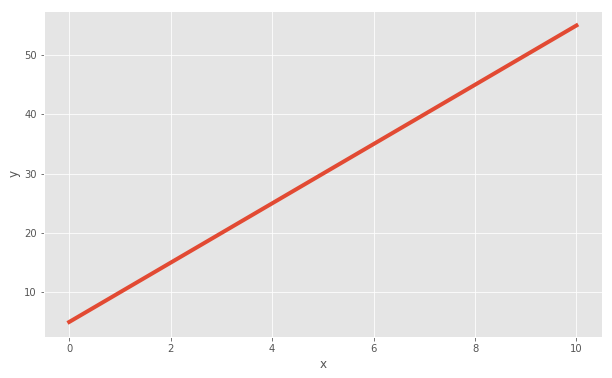

In [173]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat, linewidth=4)
plt.xlabel('x')
plt.ylabel('y')

In [175]:
y = x*5 + 20*(np.random.rand(x.size) - 0.5)+5

Text(0,0.5,'y')

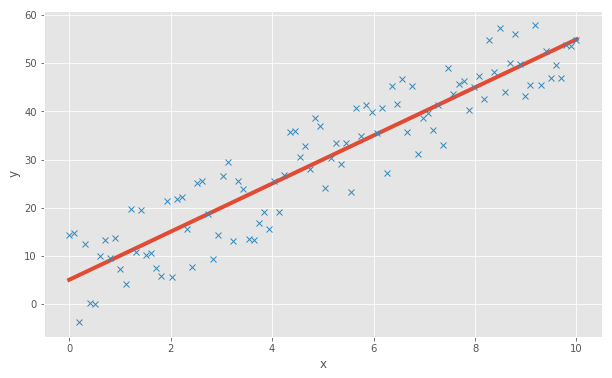

In [183]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat, linewidth=4)
plt.plot(x,y,'x')
plt.xlabel('x')
plt.ylabel('y')

In [184]:
points = np.array([(xi,yi) for xi,yi in zip(x,y)])

In [188]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [192]:
points_train = np.array([(xi,yi) for xi,yi in zip(X_train,y_train)])

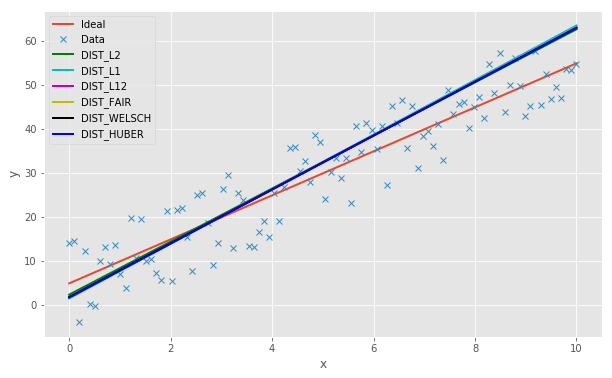

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat,linewidth=2,label='Ideal')
plt.plot(x,y,'x',label='Data')

distTypeOptions = [cv2.DIST_L2,\
                 cv2.DIST_L1,\
                 cv2.DIST_L12,\
                 cv2.DIST_FAIR,\
                 cv2.DIST_WELSCH,\
                 cv2.DIST_HUBER]

distTypeLabels = ['DIST_L2',\
                 'DIST_L1',\
                 'DIST_L12',\
                 'DIST_FAIR',\
                 'DIST_WELSCH',\
                 'DIST_HUBER']

colors = ['g','c','m','y','k','b']

for i in range(len(colors)):
    distType = distTypeOptions[i]
    distTypeLabel = distTypeLabels[i]
    c = colors[i]
    
    [vxl, vyl, xl, yl] = cv2.fitLine(np.array(points_train, dtype=np.int32), distType, 0, 0.01, 0.01)
    y_cv = [vyl[0]/vxl[0] * (xi - xl[0]) + yl[0] for xi in x]
    plt.plot(x,y_cv,c=c,linewidth=2,label=distTypeLabel)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

In [130]:
[vxl, vyl, xl, yl] = cv2.fitLine(np.array(points, dtype=np.int32), cv2.DIST_L1, 0, 0.01, 0.01)

In [131]:
vxl

array([0.19002192], dtype=float32)

In [132]:
vyl

array([0.9817799], dtype=float32)

In [133]:
vyl/vxl

array([5.1666665], dtype=float32)

In [134]:
xl

array([3.4286585], dtype=float32)

In [135]:
yl

array([18.714735], dtype=float32)

In [136]:
y_cv = [vyl[0]/vxl[0] * (xi - xl[0]) + yl[0] for xi in x]

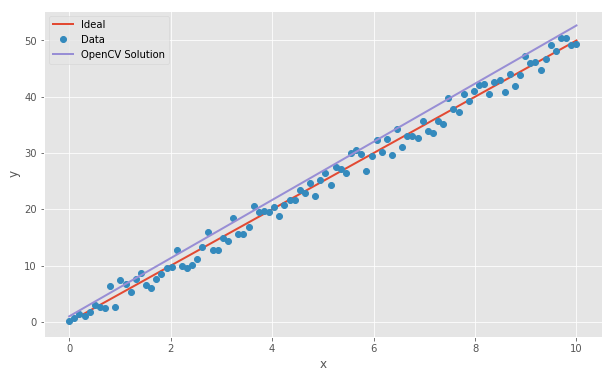

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat,linewidth=2,label='Ideal')
plt.plot(x,y,'o',label='Data')
plt.plot(x,y_cv,linewidth=2,label='OpenCV Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

In [99]:
lefty

24

In [100]:
righty

52

In [186]:
from sklearn import linear_model

In [195]:
linreg = linear_model.LinearRegression()

In [197]:
linreg.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [199]:
y_sklearn = linreg.predict(x.reshape(-1,1))

In [205]:
list(y_sklearn.reshape(1,-1)[0])

[3.967057233258764,
 4.492853423230987,
 5.018649613203211,
 5.544445803175434,
 6.070241993147658,
 6.596038183119882,
 7.1218343730921045,
 7.647630563064328,
 8.173426753036551,
 8.699222943008774,
 9.225019132981,
 9.750815322953223,
 10.276611512925445,
 10.802407702897668,
 11.328203892869892,
 11.854000082842116,
 12.379796272814339,
 12.905592462786563,
 13.431388652758786,
 13.95718484273101,
 14.482981032703234,
 15.008777222675457,
 15.534573412647681,
 16.0603696026199,
 16.586165792592126,
 17.11196198256435,
 17.63775817253657,
 18.163554362508798,
 18.68935055248102,
 19.215146742453243,
 19.74094293242547,
 20.26673912239769,
 20.792535312369914,
 21.31833150234214,
 21.844127692314363,
 22.369923882286585,
 22.895720072258808,
 23.421516262231034,
 23.947312452203256,
 24.47310864217548,
 24.998904832147705,
 25.524701022119924,
 26.05049721209215,
 26.576293402064373,
 27.1020895920366,
 27.627885782008818,
 28.15368197198104,
 28.679478161953266,
 29.205274351925492,

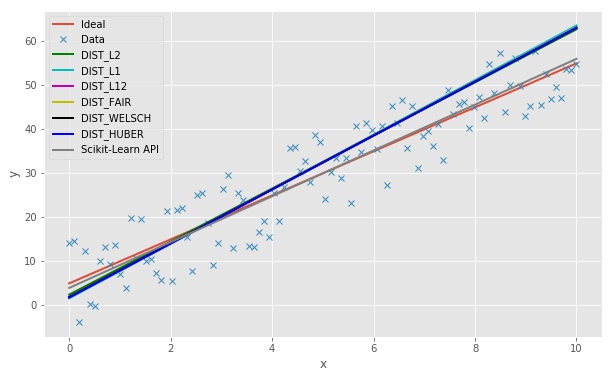

In [211]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat,linewidth=2,label='Ideal')
plt.plot(x,y,'x',label='Data')

distTypeOptions = [cv2.DIST_L2,\
                 cv2.DIST_L1,\
                 cv2.DIST_L12,\
                 cv2.DIST_FAIR,\
                 cv2.DIST_WELSCH,\
                 cv2.DIST_HUBER]

distTypeLabels = ['DIST_L2',\
                 'DIST_L1',\
                 'DIST_L12',\
                 'DIST_FAIR',\
                 'DIST_WELSCH',\
                 'DIST_HUBER']

colors = ['g','c','m','y','k','b']

for i in range(len(colors)):
    distType = distTypeOptions[i]
    distTypeLabel = distTypeLabels[i]
    c = colors[i]
    
    [vxl, vyl, xl, yl] = cv2.fitLine(np.array(points_train, dtype=np.int32), distType, 0, 0.01, 0.01)
    y_cv = [vyl[0]/vxl[0] * (xi - xl[0]) + yl[0] for xi in x]
    plt.plot(x,y_cv,c=c,linewidth=2,label=distTypeLabel)

plt.plot(x,list(y_sklearn.reshape(1,-1)[0]),c='0.5',linewidth=2,label='Scikit-Learn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

## Using linear regression to predict Boston housing prices

The easiest regression model is called **linear regression**. The idea behind linear regression is
to describe a target variable (such as Boston house pricing) with a linear combination of
features.

If you want to understand how the math behind linear regression works, please refer to the book (p.65ff.).

To get a better understanding of linear regression, we want to build a simple model that can
be applied to one of the most famous machine learning datasets known as the **Boston
housing prices dataset**. Here, the goal is to predict the value of homes in several Boston
neighborhoods in the 1970s, using information such as crime rate, property tax rate,
distance to employment centers, and highway accessibility.

### Loading the dataset

We can again thank scikit-learn for easy access to the dataset. We first import all the
necessary modules, as we did earlier:

In [212]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

Then, loading the dataset is a one-liner:

In [213]:
boston = datasets.load_boston()

The structure of the boston object is identical to the `iris` object. We can get more information about the dataset by looking at the fields of the `boston` object:
- `DESCR`: Get a description of the data
- `data`: The actual data, <`num_samples` x `num_features`>
- `feature_names`: The names of the features
- `target`: The class labels, <`num_samples` x 1>
- `target_names`: The names of the class labels

In [214]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

The dataset contains a total of 506 data points, each of which has 13 features:

In [215]:
boston.data.shape

(506, 13)

Of course, we have only a single target value, which is the housing price:

In [216]:
boston.target.shape

(506,)

### Training the model

Believe it or not, OpenCV does not offer any good implementation of linear regression.
Some people online say that you can use `cv2.fitLine`, but that is different. This is a
perfect opportunity to get familiar with scikit-learn's API:

In [217]:
linreg = linear_model.LinearRegression()

In the preceding command, we want to split the data into training and test sets. We are free
to make the split as we see fit, but usually it is a good idea to reserve between 10 percent
and 30 percent for testing. Here, we choose 10 percent, using the `test_size` argument:

In [218]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=42
)

In scikit-learn, the `train` function is called `fit`, but otherwise behaves exactly the same as
in OpenCV:

In [219]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can look at the mean squared error of our predictions by comparing the true housing
prices, `y_train`, to our predictions, `linreg.predict(X_train)`:

In [220]:
metrics.mean_squared_error(y_train, linreg.predict(X_train))

22.7375901544866

The `score` method of the `linreg` object returns the coefficient of determination (R
squared):

In [221]:
linreg.score(X_train, y_train)

0.7375152736886281

### Testing the model

In order to test the **generalization performance** of the model, we calculate the mean
squared error on the test data:

In [12]:
y_pred = linreg.predict(X_test)

In [13]:
metrics.mean_squared_error(y_test, y_pred)

14.995852876582541

We note that the mean squared error is a little lower on the test set than the training set.
This is good news, as we care mostly about the test error. However, from these numbers, it
is really hard to understand how good the model really is. Perhaps it's better to plot the
data:

Text(0,0.5,'target value')

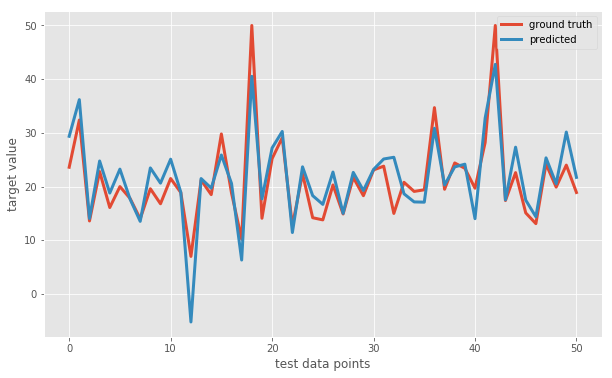

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

This makes more sense! Here we see the ground truth housing prices for all test samples
in blue and our predicted housing prices in red. Pretty close, if you ask me. It is interesting
to note though that the model tends to be off the most for really high or really low housing
prices, such as the peak values of data point 12, 18, and 42. We can formalize the amount of
variance in the data that we were able to explain by calculating $R^2$:

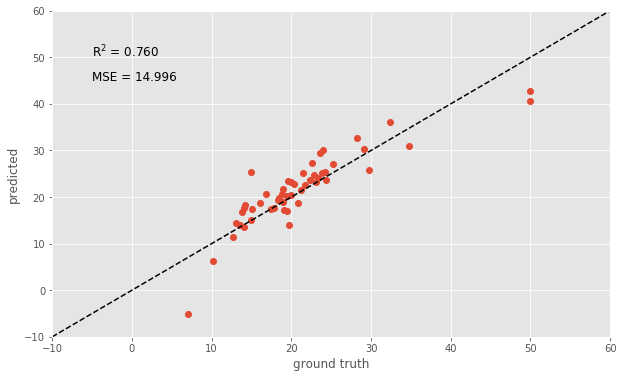

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12);

If our model was perfect, then all data points would lie on the dashed diagonal, since
`y_pred` would always be equal to `y_true`. Deviations from the diagonal indicate that the
model made some errors, or that there is some variance in the data that the model was not
able to explain. Indeed, $R^2$ indicates that we were able to explain 76 percent of the scatter in
the data, with a mean squared error of 14.996. These are some hard numbers we can use to
compare the linear regression model to some more complicated ones.

<!--NAVIGATION-->
< [Understanding the k-NN Classifier](03.02-Understanding-the-k-NN-Algorithm.ipynb) | [Contents](../README.md) | [Applying Lasso and Ridge Regression](03.04-Applying-Lasso-and-Ridge-Regression.ipynb) >